In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Scarica il file https://data.nasa.gov/resource/2vr3-k9wn.json . Esso contiene i dati di asteroidi e comete. Crea un notebook in cui:
- è creato un dataframe contenente i dati;
- è calcolata la media del periodo orbitale (colonna period_yr) per ogni categoria di classe orbitale (la colonna orbit_class);
- utilizzando i metodi grafici dei dataframe, è tracciato un grafico a dispersione che rappresenti i valori della colonna moid_au rispetto a quelli di period_yr.

In [2]:
df = pd.read_json("dati.json")
df

,designation,discovery_date,h_mag,moid_au,q_au_1,q_au_2,period_yr,i_deg,pha,orbit_class
0,419880 (2011 AH37),2011-01-07T00:00:00.000,19.7,0.035,0.84,4.26,4.06,9.65,Y,Apollo
1,419624 (2010 SO16),2010-09-17T00:00:00.000,20.5,0.028,0.93,1.08,1.00,14.52,Y,Apollo
2,414772 (2010 OC103),2010-07-28T00:00:00.000,19.0,0.333,0.39,2.00,1.31,23.11,N,Apollo
3,414746 (2010 EH20),2010-03-06T00:00:00.000,18.0,0.268,1.25,3.99,4.24,23.89,N,Amor
4,407324 (2010 OB101),2010-07-18T00:00:00.000,20.7,0.111,0.77,2.46,2.06,9.12,N,Apollo
...,...,...,...,...,...,...,...,...,...,...
197,(2010 CO1),2010-02-01T00:00:00.000,21.5,0.023,0.79,1.23,1.02,24.03,Y,Apollo
198,P/2010 B2 (WISE),2010-01-22T00:00:00.000,NaN,0.630,1.62,4.60,5.49,8.93,n/a,Encke-type Comet
199,(2010 AU118),2010-01-13T00:00:00.000,17.7,0.147,1.13,2.12,2.06,43.73,N,Amor
200,(2010 AG79),2010-01-13T00:00:00.000,19.9,0.244,1.22,4.59,4.95,32.96,N,Amor


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   designation     202 non-null    object 
 1   discovery_date  202 non-null    object 
 2   h_mag           181 non-null    float64
 3   moid_au         202 non-null    float64
 4   q_au_1          202 non-null    float64
 5   q_au_2          200 non-null    float64
 6   period_yr       200 non-null    float64
 7   i_deg           202 non-null    float64
 8   pha             202 non-null    object 
 9   orbit_class     202 non-null    object 
dtypes: float64(6), object(4)
memory usage: 15.9+ KB


In [4]:
df[["orbit_class","period_yr"]].groupby("orbit_class").mean()

,period_yr
orbit_class,
Amor,5.235082
Apollo,2.941143
Aten,0.891333
Comet,238220.625556
Encke-type Comet,5.490000
Halley-type Comet*,23.375000
Jupiter-family Comet,8.380000
Jupiter-family Comet*,17.300000
Parabolic Comet,NaN


In [5]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   designation     181 non-null    object 
 1   discovery_date  181 non-null    object 
 2   h_mag           181 non-null    float64
 3   moid_au         181 non-null    float64
 4   q_au_1          181 non-null    float64
 5   q_au_2          181 non-null    float64
 6   period_yr       181 non-null    float64
 7   i_deg           181 non-null    float64
 8   pha             181 non-null    object 
 9   orbit_class     181 non-null    object 
dtypes: float64(6), object(4)
memory usage: 15.6+ KB


<AxesSubplot:xlabel='discovery_date', ylabel='period_yr'>

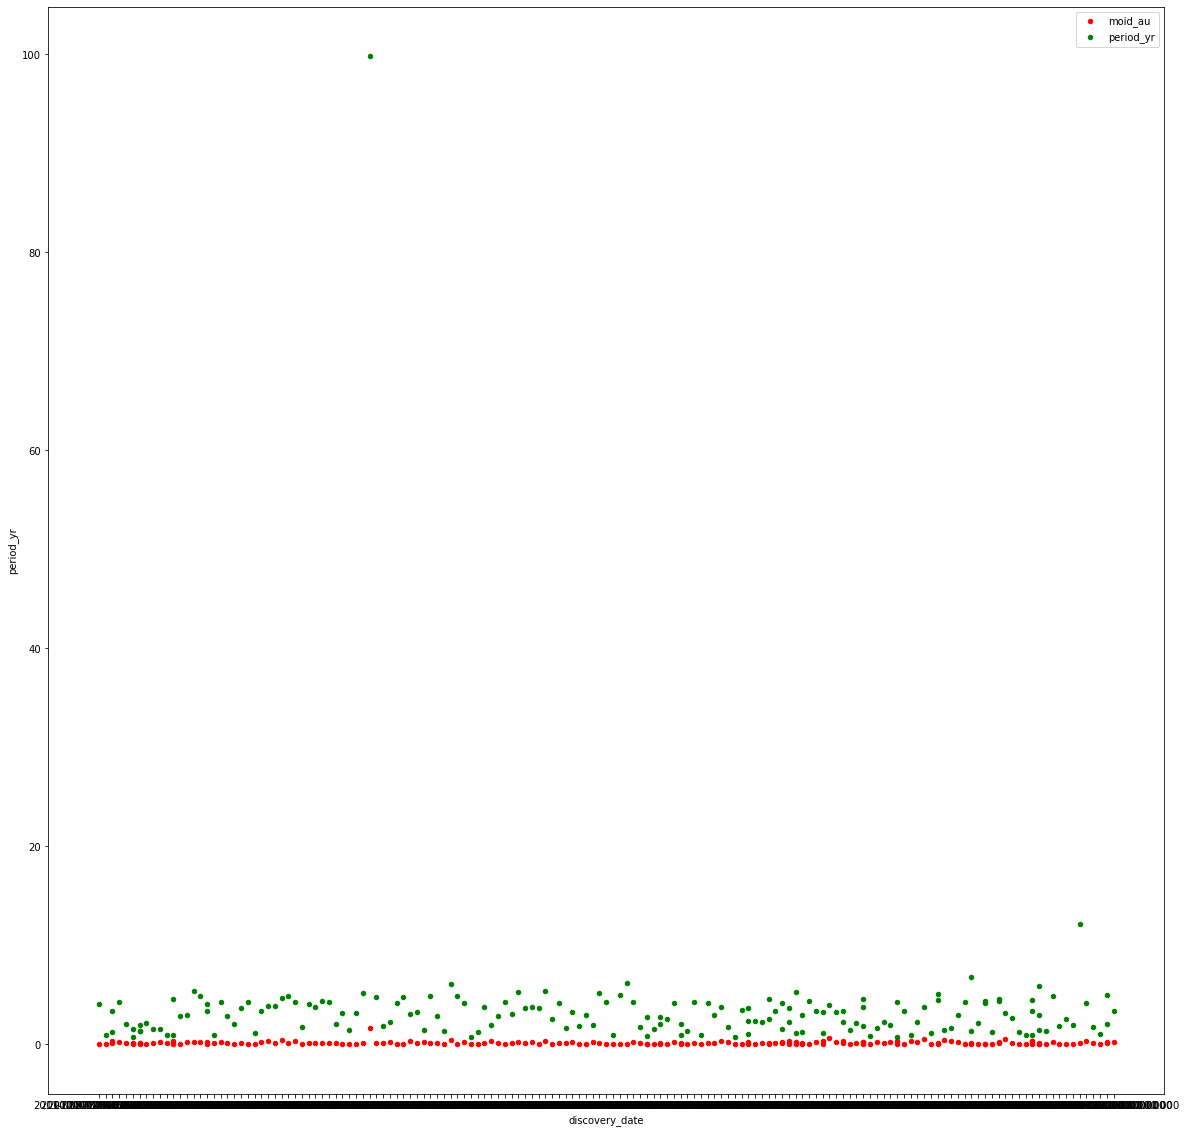

In [6]:
ax = df.plot(kind='scatter', x='discovery_date', y='moid_au', color='r', figsize=(20,20), legend=True, label='moid_au', fontsize=10)    
df.plot(kind='scatter', x='discovery_date', y='period_yr', color='g', ax=ax, label='period_yr') 

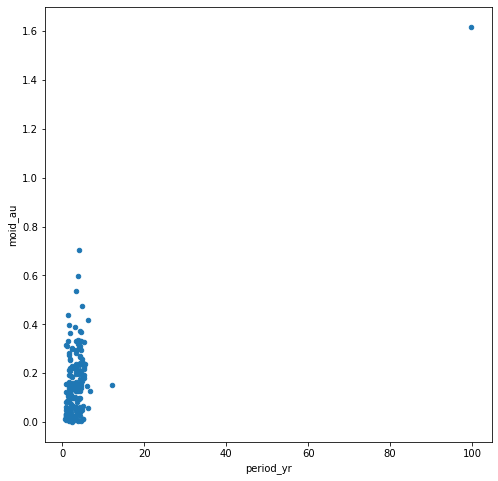

In [10]:
# OPPURE

fig,ax = plt.subplots(figsize=(8,8))
df.plot.scatter(x="period_yr", y="moid_au", ax=ax)
#ax.scatter(df["period_yr"], df["moid_au"])
plt.show()